In [25]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
url = (
    'https://pkgstore.datahub.io/machine-learning/'
    'iris/iris_json/data/23a7b3de91da915b506f7ca23f6d1141/'
    'iris_json.json')
data = pd.read_json(url)
data.head()

,class,petallength,petalwidth,sepallength,sepalwidth
0,Iris-setosa,1.4,0.2,5.1,3.5
1,Iris-setosa,1.4,0.2,4.9,3.0
2,Iris-setosa,1.3,0.2,4.7,3.2
3,Iris-setosa,1.5,0.2,4.6,3.1
4,Iris-setosa,1.4,0.2,5.0,3.6


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
class          150 non-null object
petallength    150 non-null float64
petalwidth     150 non-null float64
sepallength    150 non-null float64
sepalwidth     150 non-null float64
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [28]:
data.describe()

,petallength,petalwidth,sepallength,sepalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,3.758667,1.198667,5.843333,3.054000
std,1.764420,0.763161,0.828066,0.433594
min,1.000000,0.100000,4.300000,2.000000
25%,1.600000,0.300000,5.100000,2.800000
50%,4.350000,1.300000,5.800000,3.000000
75%,5.100000,1.800000,6.400000,3.300000
max,6.900000,2.500000,7.900000,4.400000


In [29]:
data['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

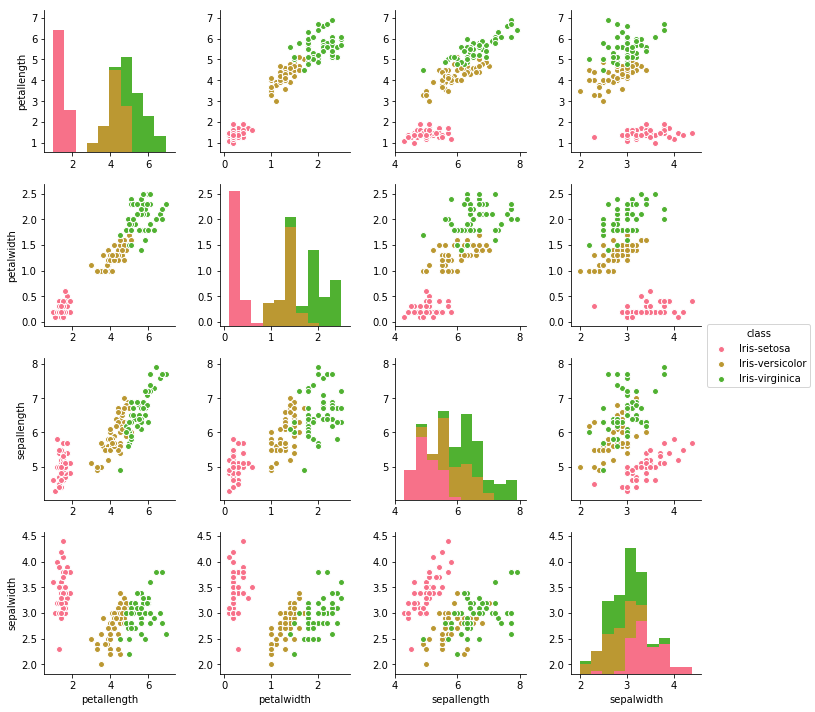

In [30]:
g = sns.pairplot(data, hue='class', markers='o')
plt.show()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


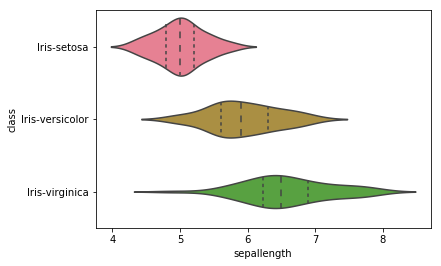

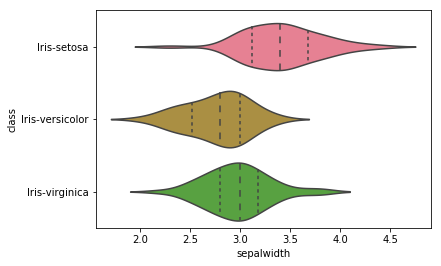

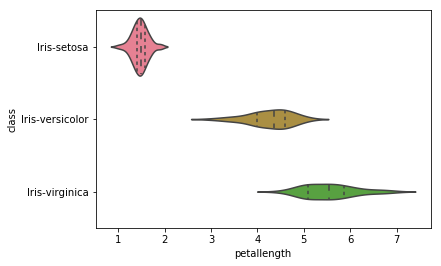

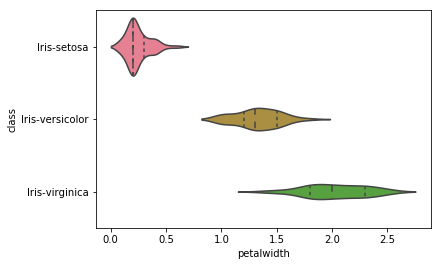

In [31]:
g = sns.violinplot(y='class', x='sepallength', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='sepalwidth', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='petallength', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='petalwidth', data=data, inner='quartile')
plt.show()

In [34]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [42]:
X = data.drop(['class'], axis=1)
y = data['class']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


# Do not consider split data sets (For testing purpuses)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X)
score = metrics.accuracy_score(y, y_pred)

score

0.95999999999999996

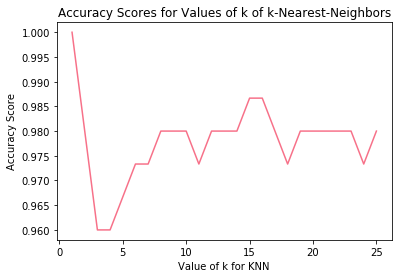

In [51]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# Split train and test data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.98333333333333328

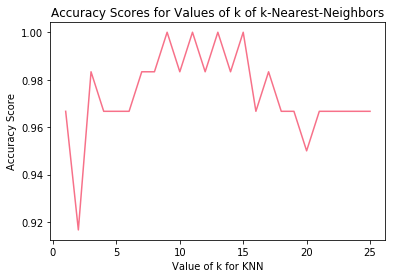

In [54]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()